<a href="https://colab.research.google.com/github/SukrajPutera/Kelompok-3-Data-Science-Binar/blob/main/Tugas_Platinum_Binar_Kelompok_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re

In [2]:
from google.colab import files

uploaded = files.upload()


Saving train_preprocess.tsv.txt to train_preprocess.tsv.txt


In [3]:
# Load the TSV file
df = pd.read_csv('train_preprocess.tsv.txt', sep='\t')


In [4]:
# Explore the dataset
print(df.head())  # Display the first few rows of the DataFrame
print(df.info())  # Display information about the DataFrame, including column names and data types
print(df.describe())  # Generate descriptive statistics of the DataFrame

  warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !  \
0  mohon ulama lurus dan k212 mmbri hujjah partai...                                                                                                                                                                                                                                                                                                                                                                     
1  lokasi strategis di jalan sumatera bandung . t...                                                                                                                                

In [5]:
# Perform initial data cleaning
columns_to_drop = ['irrelevant_column1', 'irrelevant_column2']
existing_columns = df.columns.tolist()  # Get the list of existing columns in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]  # Check if the columns exist in the DataFrame
df = df.drop(columns=columns_to_drop)  # Drop the specified columns from the DataFrame


In [6]:
# Handle missing values
print(df.isnull().sum())  # Check the number of missing values in each column
df = df.dropna()  # Drop rows with missing values or use fillna() to impute missing values


warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !    0
positive                                                                                                                                                                                                                                                                                                                                                                                                                0
dtype: int64


In [7]:
# Validate the cleansed data
print(df.info())      # Verify the information of the DataFrame after cleansing
print(df.describe())  # Validate the descriptive statistics of the DataFrame after cleansing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 2 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                                                --------------  ----- 
 0   warung ini dimiliki

In [8]:
# Removing special characters, punctuation, and unwanted symbols from the text using re.sub()

# Define a function to remove special characters using re.sub()
def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', str(text))

# Apply the function to the entire DataFrame using applymap()
df_cleaned = df.applymap(remove_special_chars)


In [9]:
# Removing numbers or digits using \d or \D
digit_pattern = r'\d'
df_cleaned = df_cleaned.replace({digit_pattern: ''}, regex=True)

In [10]:
# Remove leading/trailing whitespace using \s
df_cleaned = df.replace({r'\s': ''}, regex=True)

# Remove multiple spaces using \s+
df_cleaned = df_cleaned.replace({r'\s+': ' '}, regex=True)

In [11]:
# Function to remove HTML tags using regex
def remove_html_tags(text):
    clean_text = re.sub(r'<.*?>', '', str(text))
    return clean_text

# Function to remove URLs using regex
def remove_urls(text):
    clean_text = re.sub(r'http\S+|www\S+', '', str(text))
    return clean_text

# Apply the functions to the entire DataFrame using applymap()
df_cleaned = df.applymap(remove_html_tags)
df_cleaned = df_cleaned.applymap(remove_urls)

In [12]:
print(df_cleaned)

      warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !  \
0      mohon ulama lurus dan k212 mmbri hujjah partai...                                                                                                                                                                                                                                                                                                                                                                     
1      lokasi strategis di jalan sumatera bandung . t...                                                                                                                    

In [13]:
# Handle missing values
print(df.isnull().sum())  # Check the number of missing values in each column


warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !    0
positive                                                                                                                                                                                                                                                                                                                                                                                                                0
dtype: int64


In [14]:
# Drop rows with missing values
df = df.dropna()


In [15]:
# Validate the cleansed data
print(df.info())      # Verify the information of the DataFrame after cleansing
print(df.describe())  # Validate the descriptive statistics of the DataFrame after cleansing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 2 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                                                --------------  ----- 
 0   warung ini dimiliki

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [17]:
# Assuming your DataFrame is named 'df'
X = df.drop('positive', axis=1)  # Drop the target variable column
y = df['positive']  # Assign the target variable column


In [18]:
# Split the dataset into training and testing sets (e.g., 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
print("Training set shape:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print()

print("Testing set shape:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Training set shape:
X_train: (8799, 1)
y_train: (8799,)

Testing set shape:
X_test: (2200, 1)
y_test: (2200,)


In [20]:
print("Sample from the training set:")
print(X_train.head())
print(y_train.head())
print()

print("Sample from the testing set:")
print(X_test.head())
print(y_test.head())


Sample from the training set:
      warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !
8965   apa bahaya nya ketika prabowo menjadi presiden...                                                                                                                                                                                                                                                                                                                                                                  
5936   ke sini hanya untuk sarapan saja . kebetulan m...                                                                                            

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [22]:
# Assuming you have preprocessed data in 'X' (input features) and 'y' (target variable)
# Split the preprocessed dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Create an instance of the TfidfVectorizer
vectorizer = TfidfVectorizer()


In [24]:
# Fit the vectorizer on the training data and transform both training and testing data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# X_train_tfidf and X_test_tfidf now contain the extracted TF-IDF features

In [25]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)


(1, 47)
(1, 47)


In [26]:
print(X_train_tfidf[:5])  # Print the first 5 rows of the training set
print(X_test_tfidf[:5])   # Print the first 5 rows of the testing set


  (0, 39)	0.10660035817780521
  (0, 7)	0.10660035817780521
  (0, 0)	0.10660035817780521
  (0, 8)	0.10660035817780521
  (0, 18)	0.10660035817780521
  (0, 42)	0.10660035817780521
  (0, 27)	0.10660035817780521
  (0, 5)	0.10660035817780521
  (0, 22)	0.10660035817780521
  (0, 17)	0.10660035817780521
  (0, 40)	0.10660035817780521
  (0, 6)	0.10660035817780521
  (0, 13)	0.10660035817780521
  (0, 14)	0.10660035817780521
  (0, 33)	0.10660035817780521
  (0, 34)	0.10660035817780521
  (0, 1)	0.10660035817780521
  (0, 35)	0.10660035817780521
  (0, 21)	0.10660035817780521
  (0, 43)	0.10660035817780521
  (0, 12)	0.10660035817780521
  (0, 3)	0.10660035817780521
  (0, 44)	0.10660035817780521
  (0, 25)	0.21320071635561041
  (0, 26)	0.10660035817780521
  (0, 16)	0.10660035817780521
  (0, 20)	0.10660035817780521
  (0, 23)	0.10660035817780521
  (0, 19)	0.10660035817780521
  (0, 11)	0.21320071635561041
  (0, 4)	0.10660035817780521
  (0, 2)	0.10660035817780521
  (0, 9)	0.10660035817780521
  (0, 32)	0.10660035

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [28]:
# Assuming `X_train` is the training feature matrix after feature extraction
text = " ".join(X_train.astype(str).values.flatten())

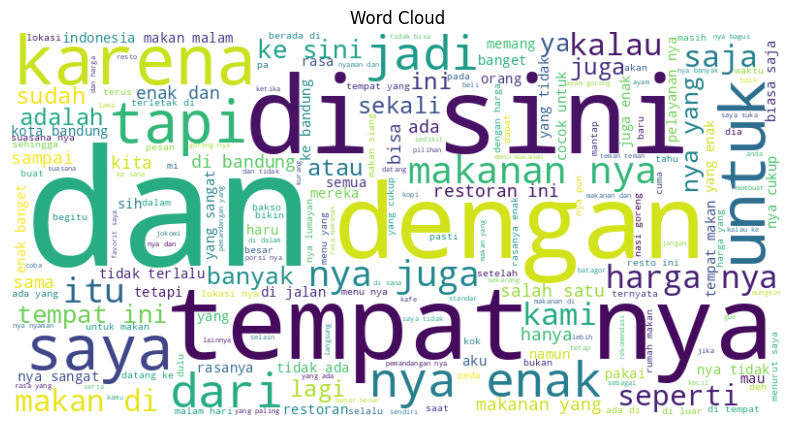

In [29]:
# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

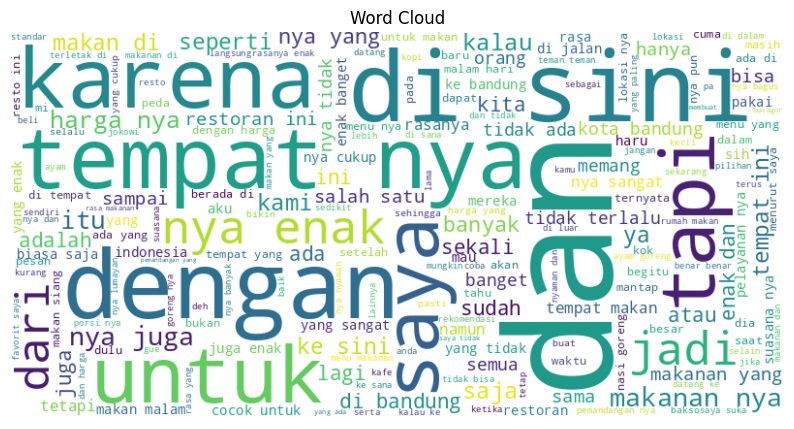

In [30]:
# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [45]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [46]:
# Step 3: Convert text to bag-of-words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences).toarray()

In [57]:
# Step 4: Convert labels to numeric format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

In [58]:
# Step 5: Convert numeric labels to one-hot encoding
y = to_categorical(y)

In [59]:
# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Step 7: Train a neural network model
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]

model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(output_dim, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
275/275 [==============================] - 8s 27ms/step - loss: 0.4800 - accuracy: 0.8120 - val_loss: 0.3744 - val_accuracy: 0.8605
Epoch 2/10
275/275 [==============================] - 6s 22ms/step - loss: 0.2013 - accuracy: 0.9341 - val_loss: 0.3611 - val_accuracy: 0.8705
Epoch 3/10
275/275 [==============================] - 7s 25ms/step - loss: 0.1032 - accuracy: 0.9694 - val_loss: 0.3913 - val_accuracy: 0.8682
Epoch 4/10
275/275 [==============================] - 6s 22ms/step - loss: 0.0618 - accuracy: 0.9803 - val_loss: 0.4296 - val_accuracy: 0.8709
Epoch 5/10
275/275 [==============================] - 10s 35ms/step - loss: 0.0412 - accuracy: 0.9860 - val_loss: 0.4771 - val_accuracy: 0.8709
Epoch 6/10
275/275 [==============================] - 6s 22ms/step - loss: 0.0304 - accuracy: 0.9890 - val_loss: 0.5204 - val_accuracy: 0.8645
Epoch 7/10
275/275 [==============================] - 7s 26ms/step - loss: 0.0241 - accuracy: 0.9915 - val_loss: 0.5613 - val_accuracy: 0.862

In [61]:
# Step 8: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

69/69 [==============================] - 1s 7ms/step - loss: 0.6730 - accuracy: 0.8564
Accuracy: 0.8563636541366577


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert one-hot encoded labels back to original class labels
y_test_original = label_encoder.inverse_transform(np.argmax(y_test, axis=1))
predicted_labels_original = label_encoder.inverse_transform(predicted_labels)

accuracy = accuracy_score(y_test_original, predicted_labels_original)
precision = precision_score(y_test_original, predicted_labels_original, average='weighted')
recall = recall_score(y_test_original, predicted_labels_original, average='weighted')
f1 = f1_score(y_test_original, predicted_labels_original, average='weighted')

print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Evaluation Metrics:
Accuracy: 0.8563636363636363
Precision: 0.8563119122257054
Recall: 0.8563636363636363
F1-Score: 0.8563328821508593


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Correct import for pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

In [37]:
# Step 1: Load the dataset into a pandas DataFrame
df = pd.read_csv('train_preprocess.tsv.txt', sep='\t')
df.columns = ['Text', 'Sentiment']

In [38]:
# Step 2: Preprocess the text data (Tokenization)
sentences = df['Text'].values
labels = df['Sentiment'].values


In [39]:
max_words = 10000  # maximum number of words to keep based on word frequency
max_len = 100  # maximum length of each sequence

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
X = pad_sequences(sequences, maxlen=max_len)  # Corrected the pad_sequences call

In [40]:
# Step 4: Convert labels to numeric format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

In [41]:
# Step 5: Convert numeric labels to one-hot encoding
y = to_categorical(y)

In [42]:
# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Step 7: Train an LSTM model
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]

model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(output_dim, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
275/275 [==============================] - 34s 115ms/step - loss: 0.5050 - accuracy: 0.7961 - val_loss: 0.3596 - val_accuracy: 0.8568
Epoch 2/10
275/275 [==============================] - 36s 133ms/step - loss: 0.2254 - accuracy: 0.9174 - val_loss: 0.3503 - val_accuracy: 0.8641
Epoch 3/10
275/275 [==============================] - 38s 137ms/step - loss: 0.1261 - accuracy: 0.9562 - val_loss: 0.3785 - val_accuracy: 0.8723
Epoch 4/10
275/275 [==============================] - 36s 131ms/step - loss: 0.0816 - accuracy: 0.9689 - val_loss: 0.4566 - val_accuracy: 0.8659
Epoch 5/10
275/275 [==============================] - 30s 111ms/step - loss: 0.0543 - accuracy: 0.9760 - val_loss: 0.5213 - val_accuracy: 0.8655
Epoch 6/10
275/275 [==============================] - 32s 117ms/step - loss: 0.0418 - accuracy: 0.9815 - val_loss: 0.6010 - val_accuracy: 0.8627
Epoch 7/10
275/275 [==============================] - 32s 115ms/step - loss: 0.0277 - accuracy: 0.9869 - val_loss: 0.6782 - val_ac

In [54]:
# Step 8: Evaluate the LSTM model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

69/69 [==============================] - 1s 21ms/step - loss: 0.6935 - accuracy: 0.8564
Accuracy: 0.8563636541366577


In [56]:
# Convert one-hot encoded labels back to original class labels
y_test_original = label_encoder.inverse_transform(np.argmax(y_test, axis=1))
predicted_labels_original = label_encoder.inverse_transform(predicted_labels)

accuracy = accuracy_score(y_test_original, predicted_labels_original)
precision = precision_score(y_test_original, predicted_labels_original, average='weighted')
recall = recall_score(y_test_original, predicted_labels_original, average='weighted')
f1 = f1_score(y_test_original, predicted_labels_original, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8563636363636363
Precision: 0.8563119122257054
Recall: 0.8563636363636363
F1-Score: 0.8563328821508593
